In [1]:
import Simulation as G
import RotRep as R
import numpy as np
import matplotlib.pyplot as plt
from IntBin import ReadI9BinaryFiles
from ImageData import ExpImage
import OverlapInfo

In [20]:
reload(G)

<module 'Simulation' from 'Simulation.py'>

In [2]:
exp={'energy':71.676}
etalimit=81/180.0*np.pi
grainpos=np.array([0, 0.0974279, 0])
orien=R.EulerZXZ2Mat(np.array([89.5003, 80.7666, 266.397])/180.0*np.pi)

reload(G)
sample=G.CrystalStr('Ti7')
#sample.setPrim([3.61,0,0],[0,3.61,0],[0,0,3.61])
#sample.addAtom([0,0,0],29)
sample.getRecipVec()
sample.getGs(10)


Det1=G.Detector()
Det1.Move(935.166,1998.96,np.array([4.72573,0,0]),R.EulerZXZ2Mat(np.array([90.6659, 89.4069,359.073])/180.0*np.pi))
Det2=G.Detector()
Det2.Move(949.46,1996.15,np.array([6.67079,0,0]),R.EulerZXZ2Mat(np.array([89.4765, 90.2675,359.22])/180.0*np.pi))
Det3=G.Detector()
Det3.Move(966.576,1994.19,np.array([8.63154,0,0]),R.EulerZXZ2Mat(np.array([89.24, 90.545,359.188])/180.0*np.pi))

In [98]:
%timeit Peaks1,Gs1,PeaksInfo1=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos,getPeaksInfo=True,**exp)

10 loops, best of 3: 39.9 ms per loop


In [4]:
Peaks1[189]

array([ 1857.        ,  1779.        ,    31.41154605])

In [29]:
Peaks1=[]
Peaks2=[]
Peaks3=[]
#CorGs=[]
rotatedG=orien.dot(sample.Gs.T).T
for g1 in rotatedG:
    res=G.frankie_angles_from_g(g1,verbo=False,**exp)
    if res['chi']>=90:
        pass
    elif res['eta']>etalimit:
        pass
    else:
        if -90<=res['omega_a']<=90:
            omega=res['omega_a']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            try:
                idx1=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],res['eta'])
                idx2=Det2.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],res['eta'])
                idx3=Det3.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],res['eta'])
            except:
                print g
                print res
            if idx1!=-1:
                Peaks1.append([idx1[0],idx1[1],res['omega_a']])
            if idx2!=-1:
                Peaks2.append([idx2[0],idx2[1],res['omega_a']])
            if idx3!=-1:
                Peaks3.append([idx3[0],idx3[1],res['omega_a']])
#                CorGs.append(g)
        if -90<=res['omega_b']<=90:
            omega=res['omega_b']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            try:
                idx1=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],-res['eta'])
                idx2=Det2.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],-res['eta'])
                idx3=Det3.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],-res['eta'])
            except:
                print g
                print res
            if idx1!=-1:
                Peaks1.append([idx1[0],idx1[1],res['omega_b']])
            if idx2!=-1:
                Peaks2.append([idx2[0],idx2[1],res['omega_b']])
            if idx3!=-1:
                Peaks3.append([idx3[0],idx3[1],res['omega_b']])
#                CorGs.append(g)
Peaks1=np.array(Peaks1)
Peaks2=np.array(Peaks2)
Peaks3=np.array(Peaks3)
#CorGs=np.array(CorGs)

In [5]:
oExpData2=ExpImage(720,3,'Reduced/Ti7_S0_z0_')

In [32]:
oExpData=ExpImage(180,3,'IntReduced/S0_z0_')

In [6]:
tmp=ReadI9BinaryFiles('Reduced/Ti7_S0_z0_000000.bin0')

In [8]:
len(tmp[0])

23481

In [33]:
OverlapInfo.NaiveCostFn(oExpData,Peaks1,0)

0.9547738693467337

In [34]:
OverlapInfo.NaiveCostFn(oExpData,Peaks2,1)

0.9171597633136095

In [35]:
OverlapInfo.NaiveCostFn(oExpData,Peaks3,2)

0.9304347826086956

In [23]:
Plus,Minus=OverlapInfo.NaiveCheck(oExpData2,Peaks1,0,Gs1)

+1, i= 2
+1, i= 3
+1, i= 9
not found, i= 11
+1, i= 12
not found, i= 21
+1, i= 28
-1, i= 31
+1, i= 39
-1, i= 41
-1, i= 42
+1, i= 47
-1, i= 53
not found, i= 65
not found, i= 78
+1, i= 93
not found, i= 113
+1, i= 124
-1, i= 142
+1, i= 146
+1, i= 183
+1, i= 191


In [24]:
Plus,Minus=OverlapInfo.NaiveCheck(oExpData2,tPeaks1,0,tGs1)

-1, i= 4
+1, i= 11
+1, i= 12
not found, i= 21
-1, i= 24
+1, i= 28
+1, i= 39
not found, i= 65
not found, i= 78
-1, i= 108
+1, i= 111
not found, i= 113
+1, i= 124
-1, i= 130
-1, i= 131
-1, i= 139
-1, i= 142
+1, i= 171
+1, i= 183
-1, i= 187
+1, i= 191


In [25]:
goodidx

[2, 3, 9, 29, 37, 40, 45, 51, 141, 178]

In [18]:
candidates=[]
for i in range(9000):
    new=(np.random.random(3)-0.5)*1e-1*Gs1[3]
    new[2]=0
    tmpres=G.frankie_angles_from_g(Gs1[3]+new,verbo=False,**exp)
    if 35.25 < tmpres['omega_b'] < 35.50:
        candidates.append(np.divide(new,Gs1[3]))
candidates=np.asarray(candidates)

In [17]:
G.frankie_angles_from_g(Gs1[3],verbo=True,**exp)

2theta:  14.3005641271
chi:  21.7070109524
phi:  70.3338783073
omega_0:  -124.855917739
omega_a:  -105.189796046
omega_b:  35.4779605684
eta:  20.5494830254


{'2Theta': 0.24959192890970794,
 'chi': 21.70701095239869,
 'eta': 0.35865613837554083,
 'omega_0': -124.85591773892129,
 'omega_a': -105.18979604625881,
 'omega_b': 35.477960568416194}

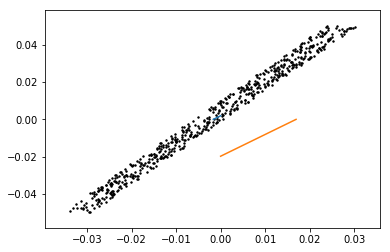

In [19]:
import matplotlib
newcandidates=candidates
plt.scatter(newcandidates[:,0],newcandidates[:,1],c='black',s=2)
plt.plot([0,0.00038467056713949703/(-0.234579675352297)],[0.00038467056713949703/0.20099501552822,0])
plt.plot([0,-0.003978652562846327/(-0.234579675352297)],[-0.003978652562846327/0.20099501552822,0])
plt.show()

<IPython.core.display.Javascript object>


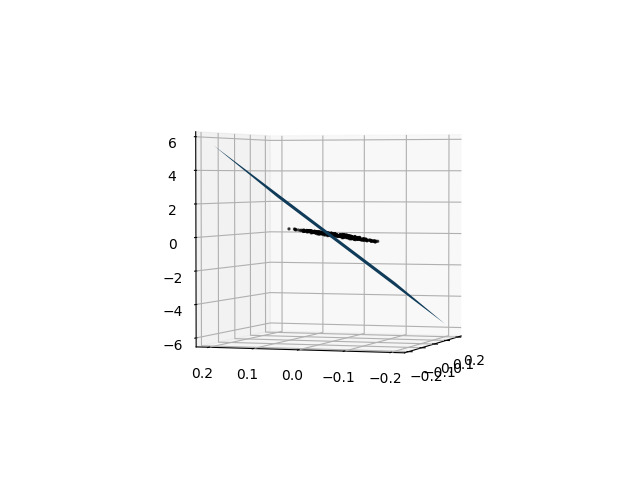

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
newcandidates=candidates*Gs1[2]
ax.scatter(newcandidates[:,0],newcandidates[:,1],newcandidates[:,2],c='black',s=2)
#ax.scatter([0],[0],[0],c='r',s=1)

xx, yy = np.meshgrid([-0.2,0.2], [-0.2,0.2])
zz=(-0.0012-0.08*xx+0.2*yy)/0.01
ax.plot_surface(xx,yy,zz)
plt.axis('scaled')


plt.show()

In [135]:
xx, yy = np.meshgrid(range(10), range(10))

In [136]:
xx

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [112]:
G.frankie_angles_from_g(Gs1[2],verbo=True,**exp)

2theta:  14.7695913678
chi:  28.7605205182
phi:  74.5060846627
omega_0:  -115.015965274
omega_a:  -99.5220499366
omega_b:  49.4901193889
eta:  27.87488101


{'2Theta': 0.25777799854306904,
 'chi': 28.760520518164849,
 'eta': 0.48650845222695327,
 'omega_a': -99.522049936589397,
 'omega_b': 49.490119388887656}

<IPython.core.display.Javascript object>


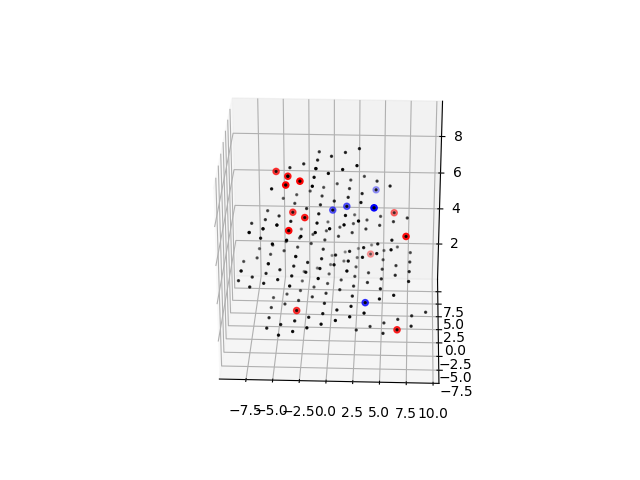

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Gs1[:,0],Gs1[:,1],Gs1[:,2],c='black',s=2)
ax.scatter(Plus[:,0],Plus[:,1],Plus[:,2],c='r')
ax.scatter(Minus[:,0],Minus[:,1],Minus[:,2],c='b')
plt.axis('scaled')
plt.show()

In [23]:
reload(OverlapInfo)

<module 'OverlapInfo' from 'OverlapInfo.py'>

In [12]:
from scipy.optimize import minimize

In [26]:
from scipy.optimize import basinhopping

In [9]:
Peaks1,Gs1=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos,**exp)

In [33]:
def ContinuousStrainCost(r):
    strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[1],r[3],r[4]],[r[2],r[4],r[5]]])
#    strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[6],r[3],r[4]],[r[7],r[8],r[5]]])
#    crystalstrain=np.eye(3)+np.array([[r[0],r[1],0],[r[1],r[2],0],[0,0,r[3]]])
#   trans=orien.dot(crystalstrain)
    trans=strain.dot(orien)
    Peaks1,Gs1=G.GetProjectedVertex(Det1,sample,trans,etalimit,grainpos,**exp)
    newScore1=OverlapInfo.NaiveCostFn2(oExpData2,Peaks1,0)
    Score=newScore1
    if newScore1>0.89:
        Peaks2,Gs2=G.GetProjectedVertex(Det2,sample,trans,etalimit,grainpos,**exp)
        newScore2=OverlapInfo.NaiveCostFn2(oExpData2,Peaks2,1)
        Score+=newScore2
        if newScore2>0.847:
            Peaks3,Gs3=G.GetProjectedVertex(Det3,sample,trans,etalimit,grainpos,**exp)
            newScore3=OverlapInfo.NaiveCostFn2(oExpData2,Peaks3,2)
            Score+=newScore3
    return -Score              

In [27]:
def StrainCost(r):
    strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[1],r[3],r[4]],[r[2],r[4],r[5]]])
#    strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[6],r[3],r[4]],[r[7],r[8],r[5]]])
    crystalstrain=np.eye(3)+np.array([[r[0],r[1],0],[r[1],r[2],0],[0,0,r[3]]])
#    trans=orien.dot(crystalstrain)
    trans=strain.dot(orien)
    Peaks1,Gs1=G.GetProjectedVertex(Det1,sample,trans,etalimit,grainpos,**exp)
    newScore1=OverlapInfo.NaiveCostFn(oExpData2,Peaks1,0)
    Score=newScore1
    if newScore1>0.89:
        Peaks2,Gs2=G.GetProjectedVertex(Det2,sample,trans,etalimit,grainpos,**exp)
        newScore2=OverlapInfo.NaiveCostFn(oExpData2,Peaks2,1)
        Score+=newScore2
        if newScore2>0.847:
            Peaks3,Gs3=G.GetProjectedVertex(Det3,sample,trans,etalimit,grainpos,**exp)
            newScore3=OverlapInfo.NaiveCostFn(oExpData2,Peaks3,2)
            Score+=newScore3
    return -Score              

In [103]:
success=[]
fail=[]
for s in (np.random.random((10,6))-0.5)*5e-5:
    r=s+np.array([  6.11914694e-04,  -6.51250890e-05,  -1.40388187e-04,
        -3.49013663e-04,   6.76412427e-04,   2.30431934e-04])
    if StrainCost(r)> -2.821:
        fail.append(s)
    else:
        success.append(s)

In [105]:
len(fail)

8

In [51]:
basinhopping(StrainCost,[  5.84145543e-04,  -3.84136494e-05,  -1.23866453e-04,
        -3.81468451e-04,   6.48829597e-04,   2.64697867e-04],niter=1000,T=0.01,stepsize=5e-5,disp=True)

basinhopping step 0: f -2.81652
basinhopping step 1: f -2.81652 trial_f -2.78227 accepted 0  lowest_f -2.81652
basinhopping step 2: f -2.80693 trial_f -2.80693 accepted 1  lowest_f -2.81652
basinhopping step 3: f -2.80693 trial_f -2.79007 accepted 0  lowest_f -2.81652
basinhopping step 4: f -2.80693 trial_f -2.79599 accepted 0  lowest_f -2.81652
basinhopping step 5: f -2.80693 trial_f -2.78729 accepted 0  lowest_f -2.81652
basinhopping step 6: f -2.80693 trial_f -2.78505 accepted 0  lowest_f -2.81652
basinhopping step 7: f -2.80693 trial_f -2.78505 accepted 0  lowest_f -2.81652
basinhopping step 8: f -2.82154 trial_f -2.82154 accepted 1  lowest_f -2.82154
found new global minimum on step 8 with function value -2.82154
basinhopping step 9: f -2.82154 trial_f -2.74299 accepted 0  lowest_f -2.82154
basinhopping step 10: f -2.82154 trial_f -2.73797 accepted 0  lowest_f -2.82154
basinhopping step 11: f -2.82154 trial_f -2.77724 accepted 0  lowest_f -2.82154
basinhopping step 12: f -2.82154 

                        fun: -2.8215437878872107
 lowest_optimization_result:       fun: -2.8215437878872107
 hess_inv: array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])
      jac: array([ 0.,  0.,  0.,  0.,  0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([  6.11914694e-04,  -6.51250890e-05,  -1.40388187e-04,
        -3.49013663e-04,   6.76412427e-04,   2.30431934e-04])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 1
                       nfev: 8692
                        nit: 1000
                       njev: 1085
                          x: array([  6.11914694e-04,  -6.51250890e-05,  -1.40388187e-04,
        -3.49013663e-04,   6.76412427e-04,   2.30431934e-04])

In [73]:
basinhopping(StrainCost,[  1.71641322e-04,  -6.41746046e-04,  -7.78268680e-05,
         7.28847000e-04],niter=50,T=0.01,stepsize=5e-5,disp=True)

basinhopping step 0: f -2.82792
basinhopping step 1: f -2.82792 trial_f -2.8229 accepted 0  lowest_f -2.82792
basinhopping step 2: f -2.82792 trial_f -2.78865 accepted 0  lowest_f -2.82792
basinhopping step 3: f -2.82792 trial_f -2.78865 accepted 0  lowest_f -2.82792
basinhopping step 4: f -2.82792 trial_f -2.78865 accepted 0  lowest_f -2.82792
basinhopping step 5: f -2.82792 trial_f -2.80829 accepted 0  lowest_f -2.82792
basinhopping step 6: f -2.82792 trial_f -2.8229 accepted 0  lowest_f -2.82792
basinhopping step 7: f -2.8229 trial_f -2.8229 accepted 1  lowest_f -2.82792
basinhopping step 8: f -2.8229 trial_f -2.77268 accepted 0  lowest_f -2.82792
basinhopping step 9: f -2.8229 trial_f -2.8229 accepted 1  lowest_f -2.82792
basinhopping step 10: f -2.8229 trial_f -2.78865 accepted 0  lowest_f -2.82792
basinhopping step 11: f -2.8142 trial_f -2.8142 accepted 1  lowest_f -2.82792
basinhopping step 12: f -2.81196 trial_f -2.81196 accepted 1  lowest_f -2.82792
basinhopping step 13: f -2.

                        fun: -2.8279235125977196
 lowest_optimization_result:       fun: -2.8279235125977196
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 0.,  0.,  0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([  1.71641322e-04,  -6.41746046e-04,  -7.78268680e-05,
         7.28847000e-04])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 306
                        nit: 50
                       njev: 51
                          x: array([  1.71641322e-04,  -6.41746046e-04,  -7.78268680e-05,
         7.28847000e-04])

In [14]:
r=[1.21848180e-03,  -8.61480474e-05,  -9.66316885e-05,
        -5.17093330e-04,   6.60003483e-04,   1.44468903e-04]
print np.eye(3)+np.array([[r[0],r[1],r[2]],[r[1],r[3],r[4]],[r[2],r[4],r[5]]])

[[  1.00121848e+00  -8.61480474e-05  -9.66316885e-05]
 [ -8.61480474e-05   9.99482907e-01   6.60003483e-04]
 [ -9.66316885e-05   6.60003483e-04   1.00014447e+00]]


In [12]:
r=[8.04317474e-05,  -2.59202613e-04,  -2.19543393e-05,
         2.04578412e-04,   4.72231024e-04,   7.38361181e-04]
print np.eye(3)+np.array([[r[0],r[1],r[2]],[r[1],r[3],r[4]],[r[2],r[4],r[5]]])

[[  1.00008043e+00  -2.59202613e-04  -2.19543393e-05]
 [ -2.59202613e-04   1.00020458e+00   4.72231024e-04]
 [ -2.19543393e-05   4.72231024e-04   1.00073836e+00]]


In [102]:
for i in range(1):
    r=np.array([  6.11914694e-04,  -6.51250890e-05,  -1.40388187e-04,
        -3.49013663e-04,   6.76412427e-04,   2.30431934e-04])+success[0]
    strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[1],r[3],r[4]],[r[2],r[4],r[5]]])
#    strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[6],r[3],r[4]],[r[7],r[8],r[5]]])
    tPeaks1,tGs1=G.GetProjectedVertex(Det1,sample,strain.dot(orien),etalimit,grainpos,**exp)
    newScore1=OverlapInfo.NaiveCostFn(oExpData2,tPeaks1,0)
    if newScore1>0.89:
        print strain-np.eye(3)
        print "L0: ",newScore1
        tPeaks2,tGs2=G.GetProjectedVertex(Det2,sample,strain.dot(orien),etalimit,grainpos,**exp)
        newScore2=OverlapInfo.NaiveCostFn(oExpData2,tPeaks2,1)
        if newScore2>0.847:
            print "L1: ",newScore2
            tPeaks3,tGs3=G.GetProjectedVertex(Det3,sample,strain.dot(orien),etalimit,grainpos,**exp)
            newScore3=OverlapInfo.NaiveCostFn(oExpData2,tPeaks3,2)
            if newScore3>0.853:
                print "L2: ",newScore3

[[  6.29712381e-04  -5.07216644e-05  -1.16441106e-04]
 [ -5.07216644e-05  -3.29166436e-04   6.73490191e-04]
 [ -1.16441106e-04   6.73490191e-04   2.11627620e-04]]
L0:  0.94472361809
L1:  0.92899408284
L2:  0.947826086957


In [63]:
r=[1.21848180e-03,  -8.61480474e-05,  -9.66316885e-05,
        -5.17093330e-04,   6.60003483e-04,   1.44468903e-04]
#r=[  5.62009082e-04,  -4.52416785e-05,   1.24257870e-04,
#        -3.61850230e-04,   5.87814579e-04,  -3.86781567e-04,
#        -2.83181307e-04,   6.33561171e-04,   3.35706298e-04]
strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[1],r[3],r[4]],[r[2],r[4],r[5]]])
#strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[6],r[3],r[4]],[r[7],r[8],r[5]]])
print strain
print orien.T.dot(strain).dot(orien)-np.eye(3)

[[  1.00121848e+00  -8.61480474e-05  -9.66316885e-05]
 [ -8.61480474e-05   9.99482907e-01   6.60003483e-04]
 [ -9.66316885e-05   6.60003483e-04   1.00014447e+00]]
[[  2.84769073e-04  -6.11410046e-04   2.64657630e-04]
 [ -6.11410046e-04  -5.98646225e-04   5.24189873e-05]
 [  2.64657630e-04   5.24189873e-05   1.15973452e-03]]


In [61]:
ii=194
print int((Peaks[ii,2]+90))
print int((Peaks[ii,2]+90))+26496
b=ReadI9BinaryFiles('/work/yufengs/Mar17/S0/IntegratedReduced/S0_z0_{0:06d}.bin0'.format(int((Peaks[ii,2]+90))))
plt.scatter(2047-b[0],2047-b[1],c='b',s=1)


plt.scatter(2047-Peaks[ii][0],2047-Peaks[ii][1],c='r',s=10)

plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()

28
26524


<IPython.core.display.Javascript object>


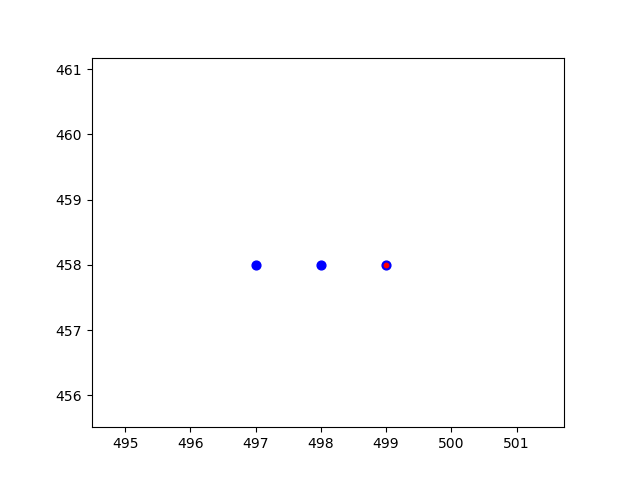

In [56]:
i=706
a=np.loadtxt('/work/yufengs/David/Sim/Au_Sim1_{0:05d}.bin0'.format(i),delimiter=',')
plt.scatter(2048-a[:,0],2048-a[:,1],c='b',s=40)
tmpidx=((-90+i*0.25<=Peaks)*(Peaks<-89.75+i*0.25))[:,2]
tmpPeaks=Peaks[tmpidx]
for ii in range(len(tmpPeaks)):
    plt.scatter(2048-tmpPeaks[ii][0],2048-tmpPeaks[ii][1],c='r',s=10)
plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()

In [19]:
strain=np.array([[  1.00046984e+00,  -4.27758020e-05 ,  1.79354529e-06],
                 [ -4.27758020e-05 ,  1.00000032e+00,   4.69362257e-04],
                 [  1.79354529e-06,   4.69362257e-04,   1.00027325e+00]])
Peaks,Gs1=G.GetProjectedVertex(Det1,sample,strain.dot(orien),etalimit,grainpos,**exp)
for ii in range(len(Peaks)):
    #print int((Peaks[ii,2]+90))
    #print int((Peaks[ii,2]+90)*4)+26496
    fig,(ax1,ax2,ax3)=plt.subplots(3,sharex=True,sharey=True)

    j=-1
    for ax in [ax1,ax2,ax3]:
        I=plt.imread('/raid/yufengs/Mar17nfS0/Ti7_S0_{0:06d}.tif'.format(int((Peaks[ii,2]+90)*4)+26496+j))

        Index=(I>50).astype('int')
        It=I*(1-Index)+50*Index

        x1=max(0,int((2047-Peaks[ii,0])-200))
        x2=x1+400
        y1=max(0,int(Peaks[ii,1]-100))
        y2=y1+200

        ax.imshow(It[y1:y2,x1:x2],cmap='gray')
        ax.scatter(int((2047-Peaks[ii,0])-x1),int(Peaks[ii,1]-y1),c='r',s=5)
        j+=1
    ax1.set_title('Peak number {0:d}/{1:d}'.format(ii+1,len(Peaks)))
    fig.subplots_adjust(hspace=0.1)
    #plt.show()
    plt.savefig('StrainPeaks/{0:04d}.png'.format(ii))

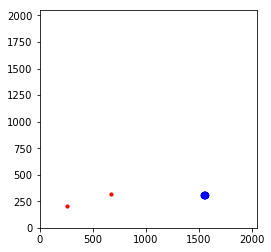

In [27]:
i=
a=np.loadtxt('/work/yufengs/Mar17/S0/Fit/Sim/Ti_Sim1_{0:05d}.bin0'.format(i),delimiter=',')
plt.scatter(2048-a[:,0],2048-a[:,1],c='b',s=40)
tmpidx=((-90+i<=Peaks1)*(Peaks1<-89+i))[:,2]
tmpPeaks=Peaks1[tmpidx]
for ii in range(len(tmpPeaks)):
    plt.scatter(2047-tmpPeaks[ii][0],2047-tmpPeaks[ii][1],c='r',s=10)
plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()

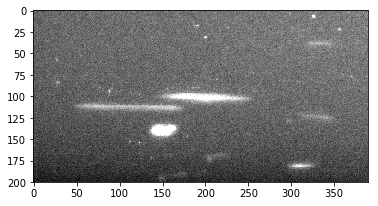

In [18]:
ii=189
I=plt.imread('/raid/yufengs/Mar17nfS0/Ti7_S0_{0:06d}.tif'.format(int((Peaks1[ii,2]+90)*4)+26496))

Index=(I>50).astype('int')
It=I*(1-Index)+50*Index
x1=int((2047-Peaks1[ii,0])-200)
x2=x1+400
y1=max(0,int(Peaks1[ii,1]-100))
y2=y1+200

plt.imshow(It[y1:y2,max(0,x1):x2],cmap='gray')
plt.show()

In [10]:
from sympy import Symbol,asin,diff,sin,cos,Matrix
from scipy.optimize import linprog

chi=Symbol('chi')
g=Symbol('g')
O=Symbol('O')
k=Symbol('k')
dg=Symbol('dg')
dchi=Symbol('dchi')
dO=Symbol('dO')

Ob=asin((g/2/k/sin(chi)))

dOb=diff(Ob,g)*dg+diff(Ob,chi)*dchi

x=g*sin(chi)*sin(O)
y=g*sin(chi)*cos(O)
z=g*cos(chi)

Dx=Symbol('Dx')
Dy=Symbol('Dy')
Dz=Symbol('Dz')

m=Matrix([[diff(x,g),diff(x,chi),diff(x,O)],[diff(y,g),diff(y,chi),diff(y,O)],[diff(z,g),diff(z,chi),diff(z,O)]])
mI=m.inv()

def get_co(PeakInfo,G,energy=71.676):
#plus or minus depends on omega_a or omega_b
    if PeakInfo['WhichOmega']=='a':
        expr=dO+dOb.subs([(chi,PeakInfo['chi']/180.0*np.pi),(g,np.linalg.norm(G)),(k,energy*0.506773182)])
    elif PeakInfo['WhichOmega']=='b':
        expr=dO-dOb.subs([(chi,PeakInfo['chi']/180.0*np.pi),(g,np.linalg.norm(G)),(k,energy*0.506773182)])
    a=mI.subs([(chi,PeakInfo['chi']/180.0*np.pi),(g,np.linalg.norm(G)),(O,PeakInfo['omega_0']/180.0*np.pi)]).dot([Dx,Dy,Dz])
    line=expr.subs([(dg,a[0]),(dchi,a[1]),(dO,a[2])])
    return line.subs([(Dx,1),(Dy,0),(Dz,0)]), line.subs([(Dx,0),(Dy,1),(Dz,0)]), line.subs([(Dx,0),(Dy,0),(Dz,1)])

#get_co(PeaksInfo1[3],Gs1[3])

In [11]:
def get_limit(oExpImage,oPeaks,PeaksInfo,Gs,energy=71.676):
    """
    for test, only use one L distance
    """
    L=0
    NumOmega=oExpImage.NumOmega
    co_s=[]
    b_s=[]
    g_s=[]
    for i in range(len(oPeaks)):
        omega=int((oPeaks[i][2]+90)*NumOmega/180)
        llimit=omega/float(NumOmega)*np.pi-np.pi*0.5
        ulimit=(omega+1)/float(NumOmega)*np.pi-np.pi*0.5
        J=int(oPeaks[i][0])
        K=int(oPeaks[i][1])
        if oExpImage.IsBright(omega,L,J,K):
            co=get_co(PeaksInfo[i],Gs[i],energy)
            co_s.append(co)
            b_s.append([llimit-oPeaks[i][2]/180.0*np.pi,ulimit-oPeaks[i][2]/180.0*np.pi])
            g_s.append(Gs[i])
        elif oExpImage.IsBright(min(omega+1,NumOmega-1),L,J,K):
            llimit=ulimit
            ulimit=llimit+1/float(NumOmega)*np.pi
            co=get_co(PeaksInfo[i],Gs[i],energy)
            co_s.append(co)
            b_s.append([llimit-oPeaks[i][2]/180.0*np.pi,ulimit-oPeaks[i][2]/180.0*np.pi])
            g_s.append(Gs[i])
        elif oExpImage.IsBright(max(omega-1,0),L,J,K):
            ulimit=llimit
            llimit=ulimit-1/float(NumOmega)*np.pi
            co=get_co(PeaksInfo[i],Gs[i],energy)
            co_s.append(co)
            b_s.append([llimit-oPeaks[i][2]/180.0*np.pi,ulimit-oPeaks[i][2]/180.0*np.pi])
            g_s.append(Gs[i])
        else:
            print "not found, i=", i
    return np.array(co_s),np.array(b_s),np.array(g_s)

In [240]:
def get_limit(oExpImage,oPeaks,PeaksInfo,Gs,energy=71.676):
    """
    for test, only use one L distance
    """
    L=0
    NumOmega=oExpImage.NumOmega
    co_s=[]
    b_s=[]
    g_s=[]
    tmpcount=0
#    for i in range(len(oPeaks)):
    for i in [41]:
        omega=int((oPeaks[i][2]+90)*NumOmega/180)
        llimit=omega/float(NumOmega)*np.pi-np.pi*0.5
        ulimit=(omega+1)/float(NumOmega)*np.pi-np.pi*0.5
        J=int(oPeaks[i][0])
        K=int(oPeaks[i][1])
        if oExpImage.IsBright(omega,L,J,K):
            if oExpImage.IsBright(max(omega-1,0),L,J,K) or oExpImage.IsBright(min(omega+1,NumOmega-1),L,J,K):
                pass
            elif tmpcount<90:
                tmpcount+=1
                pass
            else:
                print i
                co=get_co(PeaksInfo[i],Gs[i],energy)
                co_s.append(co)
                b_s.append([llimit-oPeaks[i][2]/180.0*np.pi,ulimit-oPeaks[i][2]/180.0*np.pi])
                g_s.append(Gs[i])
                tmpcount+=1
            pass
        elif oExpImage.IsBright(max(omega-1,0),L,J,K):
            if oExpImage.IsBright(min(omega-2,NumOmega-1),L,J,K):
                pass
            elif oExpImage.IsBright(omega,L,J+1,K) or oExpImage.IsBright(omega,L,J,K+1):
                pass
            elif oExpImage.IsBright(omega,L,J-1,K) or oExpImage.IsBright(omega,L,J,K-1):
                pass
            else:
                print i
                ulimit=llimit
                llimit=ulimit-1/float(NumOmega)*np.pi
                co=get_co(PeaksInfo[i],Gs[i],energy)
                co_s.append(co)
                b_s.append([llimit-oPeaks[i][2]/180.0*np.pi,ulimit-oPeaks[i][2]/180.0*np.pi])
                g_s.append(Gs[i])
            pass
        elif oExpImage.IsBright(min(omega+1,NumOmega-1),L,J,K):
            if oExpImage.IsBright(min(omega+2,NumOmega-1),L,J,K):
                pass
            elif oExpImage.IsBright(omega,L,J+1,K) or oExpImage.IsBright(omega,L,J,K+1):
                pass
            elif oExpImage.IsBright(omega,L,J-1,K) or oExpImage.IsBright(omega,L,J,K-1):
                pass
            else:
                print i
                llimit=ulimit
                ulimit=llimit+1/float(NumOmega)*np.pi
                co=get_co(PeaksInfo[i],Gs[i],energy)
                co_s.append(co)
                b_s.append([llimit-oPeaks[i][2]/180.0*np.pi,ulimit-oPeaks[i][2]/180.0*np.pi])
                g_s.append(Gs[i])
            pass

        else:
            pass
#            print "not found, i=", i
    return np.array(co_s),np.array(b_s),np.array(g_s)

In [12]:
co_s,b_s,g_s=get_limit(oExpData2,Peaks1,PeaksInfo1,Gs1)

not found, i= 11
not found, i= 21
not found, i= 65
not found, i= 78
not found, i= 113


In [15]:
goodidx=[2,3,9,29,37,40,45,51,141,178]

In [249]:
Peaks1[41][2]+b_s[0][0]*180/np.pi

-63.25

In [248]:
(tGs1[41]-g_s[0]).dot(co_s[0])

-0.00688331628873097

In [139]:
tmpres=ReadI9BinaryFiles('Reduced/Ti7_S0_z0_000095.bin0')

In [149]:
Peaks1[8]

array([ 1297.        ,  1280.        ,   -65.94390767])

<IPython.core.display.Javascript object>


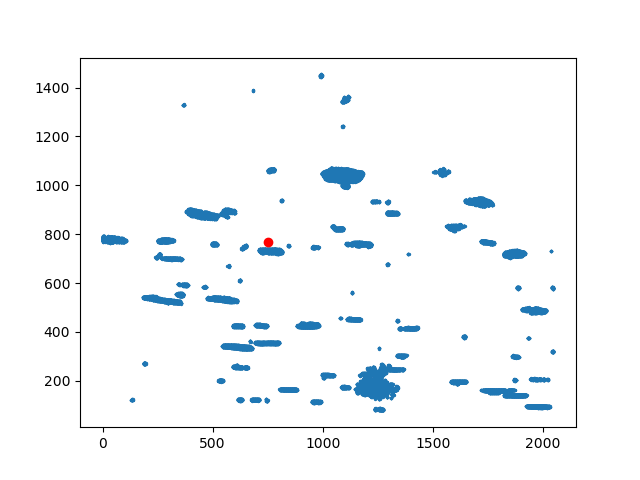

In [140]:
%matplotlib notebook

plt.scatter(2047-tmpres[0],2047-tmpres[1],s=2)
plt.scatter([2047-Peaks1[8][0]],[2047-Peaks1[8][1]],c='r')
plt.show()

In [6]:
res=G.frankie_angles_from_g(Gs1[3],verbo=True,**exp)

2theta:  14.3005641271
chi:  21.7070109524
phi:  70.3338783073
omega_0:  -124.855917739
omega_a:  -105.189796046
omega_b:  35.4779605684
eta:  20.5494830254


In [43]:
linprog(c=np.zeros(2),A_ub=[[1,2],[-1,-2],[1,-1],[-1,1]],b_ub=[10,-1,3,-1])

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 9.,  0.,  0.,  0.])
  status: 0
 success: True
       x: array([ 1.,  0.])

In [216]:
len(co_s)

163

In [19]:
As=np.empty((len(goodidx)*2,6))
bs=np.empty(len(goodidx)*2)
j=0
for i in goodidx:
    a=co_s[i][0]
    b=co_s[i][1]
    c=co_s[i][2]
    x=g_s[i][0]
    y=g_s[i][1]
    z=g_s[i][2]
    As[j]=[a*x,a*y+b*x,a*z+c*x,b*y,b*z+c*y,c*z]
    bs[j]=b_s[i][1]
    As[j+len(goodidx)]=-As[j]
    bs[j+len(goodidx)]=-b_s[i][0]
    j+=1

In [178]:
for i in range(len(co_s)):
    a=co_s[i][0]
    b=co_s[i][1]
    c=co_s[i][2]
    x=g_s[i][0]
    y=g_s[i][1]
    z=g_s[i][2]
    As[i]=[a*x,a*y,a*z,b*x,b*y,b*z,c*x,c*y,c*z]
    bs[i]=b_s[i][1]
    As[i+len(co_s)]=-As[i]
    bs[i+len(co_s)]=-b_s[i][0]

In [20]:
linprog(c=np.zeros(6),A_ub=As,b_ub=bs)

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 11
   slack: array([  3.53178995e-03,   3.41843100e-03,   4.33130517e-03,
         7.05729699e-04,   4.02890758e-03,   4.12510115e-03,
         4.36332313e-03,   9.90383023e-04,   4.36332313e-03,
         3.37294011e-03,   8.31533182e-04,   9.44892127e-04,
         3.20179562e-05,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   3.34415547e-04,   0.00000000e+00,
         2.38221977e-04,   0.00000000e+00])
  status: 0
 success: True
       x: array([ 0.00048134,  0.00034627,  0.        ,  0.        ,  0.00057705,  0.        ])

In [64]:
len(As)

388